# Labeling: Excess Return Over Mean

![image_example](img/distribution_over_mean.png)
_*Fig. 1:*_ Distribution of excess over mean return for 20 stock tickers from period between Jan 2019 and May 2020.

## Abstract

Using cross-sectional data on returns of many different stocks, each observation is labeled according to whether (or how much)
its return exceeds the mean return. It is a common practice to label observations based on whether the return is positive or negative. However, this may produce unbalanced classes, as during market booms the probability of a positive return is much higher, and during market crashes they are lower (Coqueret and Guida, 2020). Labeling according to a benchmark such as mean return
alleviates this issue.


## How it works

A dataframe containing forward total stock returns is calculated from close prices. The mean return of all companies at time $t$ in the dataframe is used to represent the market return, and excess returns are calculated by subtracting the mean return from each stock's return over the time period $t$. The numerical returns can then be used as-is (for regression analysis), or can be relabeled to represent their sign (for classification analysis).

At time $t$:

$$R_t = \{r_{t,0}, r_{t,1}, ..., r_{t,n}\}$$
$$\mu_t = mean(R_t)$$
$$L(R_t) = \{r_{t,0} - \mu_t, r_{t,1} - \mu_t, ...,r_{t,n} - \mu_t\}$$

If categorical rather than numerical labels are desired:

$$
     \begin{equation}
     \begin{split}
       L(p_{t,n}) = \begin{cases}
       -1 &\ \text{if} \ \ r_{t,n} - \mu_t < 0\\
       0 &\ \text{if} \ \ r_{t,n} - \mu_t = 0\\
       1 &\ \text{if} \ \ r_{t,n} - \mu_t > 0\\
       \end{cases}
     \end{split}
     \end{equation}
$$

---
## Examples of use

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from mlfinlab.labeling import excess_over_mean

import matplotlib.pyplot as plt

In [2]:
# Load price data for 20 stocks
tickers = "AAPL GOOG MSFT COST PFE SYY F GE BABA AMD CCL ZM FB WFC JPM AAL UBER C UA VZ"

data = yf.download(tickers, start="2019-01-20", end="2020-05-25",
                   group_by="ticker")
data = data.loc[:, (slice(None), 'Adj Close')]
data.columns = data.columns.droplevel(1)
data.head()

[*********************100%***********************]  20 of 20 completed


UBER         UA        AMD  ZM        COST         VZ  \
Date                                                                
2019-01-22   NaN  18.590000  19.760000 NaN  209.413116  54.096535   
2019-01-23   NaN  18.400000  19.799999 NaN  209.107468  54.827435   
2019-01-24   NaN  18.860001  20.850000 NaN  207.352509  54.172474   
2019-01-25   NaN  19.490000  21.930000 NaN  206.129929  53.536488   
2019-01-28   NaN  19.370001  20.180000 NaN  207.806046  52.274014   

                   GOOG          FB        JPM        WFC        MSFT  \
Date                                                                    
2019-01-22  1070.520020  147.570007  98.963676  46.484818  103.568062   
2019-01-23  1075.569946  144.300003  98.713730  46.727222  104.577469   
2019-01-24  1073.900024  145.830002  98.771400  46.596699  104.077667   
2019-01-25  1090.989990  149.009995  99.396294  46.736546  105.028282   
2019-01-28  1070.079956  147.470001  99.867378  46.447533  102.980049   

                  PFE        BABA        AAL          C         F        SYY  \
Date                                                                           
2019-01-22  39.946537  152.149994  32.219025  59.116608  7.837517  60.661575   
2019-01-23  39.842587  152.029999  31.146364  59.384232  7.689988  60.884239   
2019-01-24  38.699097  155.860001  33.124386  59.938599  7.929724  60.535717   
2019-01-25  38.406132  159.210007  34.423378  61.190701  8.169458  60.041988   
2019-01-28  37.357147  158.919998  35.988075  61.028221  7.985046  60.284012   

                  AAPL        CCL        GE  
Date                                         
2019-01-22  150.266403  51.750248  8.285392  
2019-01-23  150.874130  51.512947  8.352365  
2019-01-24  149.678253  52.224846  8.400200  
2019-01-25  154.638153  52.689953  8.763762  
2019-01-28  153.207047  53.534740  8.543714

We can find excess over mean over the given time period and plot the distribution.

In [3]:
excess1 = excess_over_mean(data)
excess1.head()

UBER        UA       AMD  ZM      COST        VZ      GOOG  \
Date                                                                     
2019-01-22   NaN -0.007947  0.004297 NaN  0.000814  0.015784  0.006991   
2019-01-23   NaN  0.015769  0.043799 NaN -0.017624 -0.021177 -0.010784   
2019-01-24   NaN  0.016450  0.034844 NaN -0.022850 -0.028694 -0.001040   
2019-01-25   NaN  0.003569 -0.070074 NaN  0.017857 -0.013856 -0.009440   
2019-01-28   NaN -0.013889 -0.037258 NaN  0.006644 -0.023677 -0.000014   

                  FB       JPM       WFC      MSFT       PFE      BABA  \
Date                                                                     
2019-01-22 -0.019886 -0.000252  0.007488  0.012020 -0.000329  0.001485   
2019-01-23  0.001372 -0.008647 -0.012024 -0.014010 -0.037931  0.015961   
2019-01-24  0.004852 -0.010628 -0.013953 -0.007821 -0.024525  0.004539   
2019-01-25 -0.000609  0.014465  0.003542 -0.009776 -0.017587  0.007904   
2019-01-28 -0.013415  0.011618  0.009429 -0.011539  0.040195 -0.004010   

                 AAL         C         F       SYY      AAPL       CCL  \
Date                                                                     
2019-01-22 -0.031020  0.006800 -0.016550  0.005944  0.006318 -0.002312   
2019-01-23  0.054276  0.000104  0.021944 -0.014955 -0.017157  0.004589   
2019-01-24  0.022261  0.003936  0.013278 -0.025110  0.016183 -0.008048   
2019-01-25  0.055180  0.007070 -0.012848  0.013757  0.000471  0.025759   
2019-01-28  0.001170 -0.001197  0.020374  0.005294 -0.001538  0.006344   

                  GE  
Date                  
2019-01-22  0.010356  
2019-01-23 -0.003504  
2019-01-24  0.026326  
2019-01-25 -0.015383  
2019-01-28  0.005467

Text(0.5, 1.0, 'Distribution of Return Over Mean for 20 Stocks')

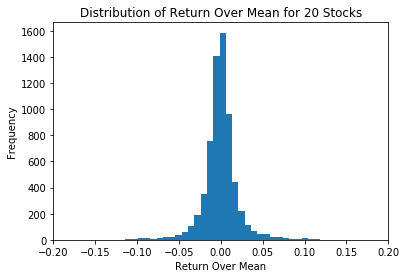

In [4]:
s1 = pd.Series(excess1.iloc[:-1, :].values.flatten())
ax1 = s1.plot.hist(bins=80)
ax1.set_xlim(-0.2,0.2)
ax1.set_xlabel('Return Over Mean')
ax1.set_title('Distribution of Return Over Mean for 20 Stocks')

We can return the sign of the excess over mean rather than the numerical value.

In [5]:
excess2 = excess_over_mean(data, binary=True)
excess2.stack().value_counts()

-1.0    3347
 1.0    3256
dtype: int64

---
## Conclusion

This notebook presents the method to label data according to excess return over mean. This method can return either numerical or categorical labels for observations. In this process:
 - Forward rates of return for assets are calculated for the entire selection of stocks indexed by time bars.
 - At each time index, the mean rate of return for all stocks is calculated. The mean is subtracted from each stock's return to find the excess return over mean.
 - If categorical labels are desired, the excess returns are converted to their signs.

This method is useful in preventing unbalanced classes, which is likely to happen when labeling simply based on the sign of the return.

## References

Coqueret, G. and Guida, T., 2020. Machine Learning For Factor Investing.